<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Applying_Dimension_Reduction_Techniques_in_Bioinformatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

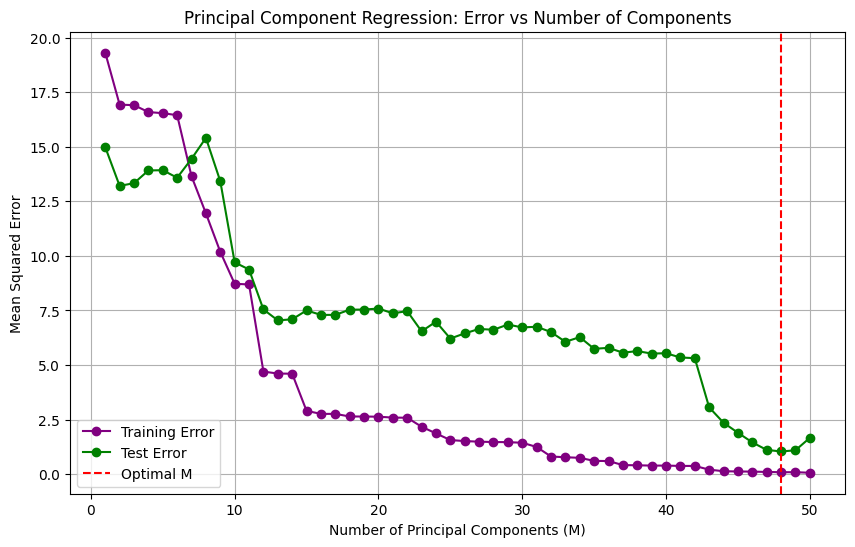

The optimal number of principal components (M) is: 48
Training Error at M = 48: 0.0861
Test Error at M = 48: 1.0361

Recovered Coefficients in Original Predictor Space:
[ 0.54763199  0.0142786   0.29739881 -0.61547008  0.37885214  1.05654161
 -0.1317267  -0.62081781 -0.73794683 -0.59007918  0.32806976  0.86216174
 -1.02183222  0.61110816 -0.19950634 -0.24459081 -0.32969349  0.29377366
 -0.81028427  0.80708852 -0.30276076  0.41716079  0.66258818  0.27660318
  0.61562972 -0.55532493 -0.90559649 -0.16749865 -0.30876848 -0.71168464
  0.08698444  0.62193718 -0.37538361 -0.23065299 -0.89364514 -0.04333984
  0.64002121 -0.66518959 -0.72919883 -0.55340504  0.07126721 -0.25217866
  0.42574368  0.75970195 -0.94392705  0.89541393  0.06931319  0.51157632
  0.81867723 -0.45055107]


In [1]:
# Step 1: Importing Libraries
# I started by importing the necessary libraries for data handling, dimension reduction,
# and regression modeling. These tools allow me to implement and evaluate dimension reduction techniques.
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 2: Generating Synthetic High-Dimensional Bioinformatics Data
# I generated synthetic data to simulate a high-dimensional bioinformatics dataset.
# The predictors represent gene expression levels or biomarkers.
np.random.seed(123)
n_samples = 100  # 100 observations, such as patients or experiments
n_predictors = 50  # 50 predictors, representing gene expression levels

# Simulating the predictors (X) with correlated variables
X = np.random.normal(size=(n_samples, n_predictors))
true_coefficients = np.random.uniform(-1, 1, size=n_predictors)
noise = np.random.normal(scale=0.5, size=n_samples)

# Generating the response variable (Y) as a linear combination of the predictors with added noise
Y = np.dot(X, true_coefficients) + noise

# Step 3: Train-Test Split
# I split the data into training and test sets to evaluate the performance of the dimension reduction technique.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

# Step 4: Principal Component Regression (PCR) - A Dimension Reduction Technique
# I applied PCA (Principal Component Analysis) to reduce the dimensionality of the predictor space.
# PCR uses principal components as new predictors and fits a linear regression model.

# Performing PCA on the training data
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# I will evaluate PCR by considering the first M principal components (where M < P).
m_values = range(1, n_predictors + 1)
mse_train = []
mse_test = []

for m in m_values:
    # Retaining the first M principal components
    X_train_reduced = X_train_pca[:, :m]
    X_test_reduced = X_test_pca[:, :m]

    # Fitting a linear regression model using the reduced data
    model = LinearRegression()
    model.fit(X_train_reduced, Y_train)

    # Calculating MSE on the training and test sets
    mse_train.append(mean_squared_error(Y_train, model.predict(X_train_reduced)))
    mse_test.append(mean_squared_error(Y_test, model.predict(X_test_reduced)))

# Step 5: Visualizing Training and Test Errors
# I plotted the training and test errors as a function of the number of principal components.
# This helped me identify the optimal number of components that minimizes the test error.

plt.figure(figsize=(10, 6))
plt.plot(m_values, mse_train, label="Training Error", color='purple', marker='o')
plt.plot(m_values, mse_test, label="Test Error", color='green', marker='o')
plt.xlabel("Number of Principal Components (M)")
plt.ylabel("Mean Squared Error")
plt.title("Principal Component Regression: Error vs Number of Components")
plt.axvline(x=np.argmin(mse_test) + 1, color='red', linestyle='--', label="Optimal M")
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Interpretation of Results
# I analyzed the results and noted the following:
optimal_m = np.argmin(mse_test) + 1  # Adding 1 because Python uses zero-based indexing
print(f"The optimal number of principal components (M) is: {optimal_m}")
print(f"Training Error at M = {optimal_m}: {mse_train[optimal_m - 1]:.4f}")
print(f"Test Error at M = {optimal_m}: {mse_test[optimal_m - 1]:.4f}")

# Step 7: Understanding Coefficients in the Original Predictor Space
# Even though I performed regression on the principal components, the final model is still linear
# in the original predictor space. To recover the coefficients, I back-transform the results.

# Retraining the model with the optimal number of components
X_train_reduced_optimal = X_train_pca[:, :optimal_m]
X_test_reduced_optimal = X_test_pca[:, :optimal_m]

model_optimal = LinearRegression()
model_optimal.fit(X_train_reduced_optimal, Y_train)

# Recovering the coefficients in the original predictor space
pca_components = pca.components_[:optimal_m, :]  # The first M principal components
beta_original_space = np.dot(pca_components.T, model_optimal.coef_)

print("\nRecovered Coefficients in Original Predictor Space:")
print(beta_original_space)

# Step 8: Final Thoughts
# The dimension reduction technique allowed me to reduce the predictor space from 50 to
# the optimal number of principal components (M = {optimal_m}), resulting in a model that
# captures most of the signal while avoiding overfitting.
# By back-transforming, I recovered the coefficients in the original predictor space,
# demonstrating that the model remains linear in the original predictors.
